# Monte Carlo By Examples

[Edward Lu](https://github.com/edwardlu71/notebooks)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from datetime import datetime
random.seed(datetime.now())

## Calculate $\large \pi$

In [2]:
def calculate_pi(samples):
    in_circle = 0
    for _ in range(samples):
        x = random.random()
        y = random.random()
        if math.sqrt(x**2 + y**2) < 1:
            in_circle += 1
    pi = float(in_circle) / samples * 4
    print(f"estimated pi = {pi} from {samples} samples")    

In [3]:
samples = 10000
calculate_pi(samples)

estimated pi = 3.114 from 10000 samples


## Calculate Integral $$ \int_{-1}^{1}e^{-x^2} = \sqrt{\pi} * Erf(1) $$

In [4]:
def distribution_func(x):
    return math.exp(-x**2)

In [5]:
def calculate_integral(samples):
    under_curve = 0
    for _ in range(samples):
        if random.random() < distribution_func(random.random()):
            under_curve += 1
    result = float(under_curve) / samples * 2
    print(f"estimated result = {result} from {samples} samples; accurate result = {math.erf(1) * math.sqrt(math.pi)}")    

In [6]:
samples = 10000
calculate_integral(samples)

estimated result = 1.4896 from 10000 samples; accurate result = 1.493648265624854


## Random Walks

In [7]:
def random_walk(steps):
    x, y = 0, 0
    for _ in range(steps):
        (dx, dy) = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy
    return (x, y)    

In [8]:
def random_walk_histogram(samples, steps):
    distances = []
    for _ in range(samples):
        walk = random_walk(steps)
        distances.append(abs(walk[0]) + abs(walk[1]))
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.hist(distances, bins=range(steps))
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

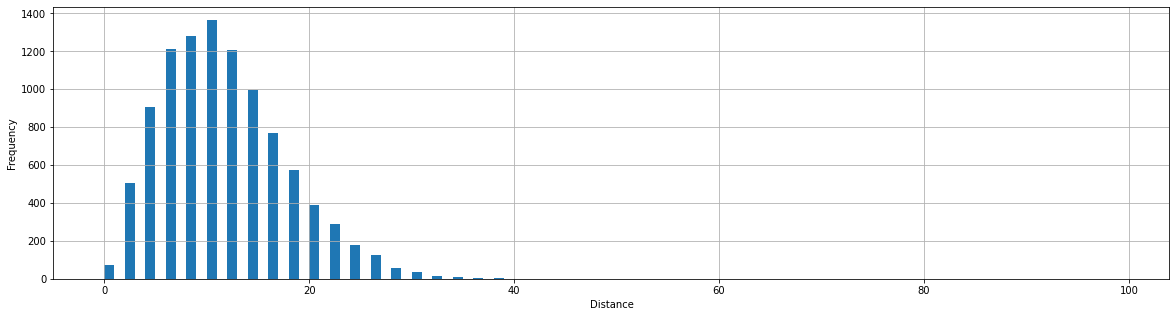

In [9]:
random_walk_histogram(10000, 100)

# Rabbit Catching

##### There are five rabbit holes in one line numbered from 1 to 5. A rabbit always sleeps in one of them and move to the next one on next day. If a farmer waits at hole #3, what's the expected days he can catch the rabbit.

In [10]:
number_of_holes = 5
waiting_at_hole = 3

def rabbit_walk():
    days = 1
    hole = random.randint(1, number_of_holes) # first day
    while hole != waiting_at_hole:
        if hole == 1:
            hole = 2
        elif hole == number_of_holes:
            hole = number_of_holes - 1
        else:
            hole += random.choice([-1, 1])
        days += 1
    return days

def rabbit_catch_histogram(samples):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk())
    print(f"maximum simulation days {max(caught_on_day)}")
    print(f"average simulation days {sum(caught_on_day)/samples}")
    fig, ax = plt.subplots(figsize=(20, 4))
    plt.hist(caught_on_day, bins=max(caught_on_day), edgecolor='black', linewidth=1)
    plt.xlabel("days")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()      

maximum simulation days 27
average simulation days 3.7805


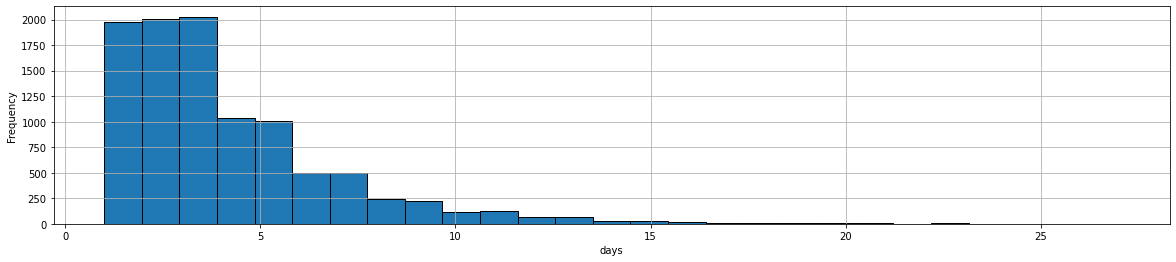

In [11]:
rabbit_catch_histogram(10000)

##### Giving condition there are 2k+1 holes in one line, and the farmer waits at the hole #k+1. show the graph of the expected days vs k

In [12]:
def rabbit_walk_k(k):
    number_of_holes = 2 * k + 1
    waiting_at_hole = k + 1
    days = 1
    hole = random.randint(1, number_of_holes) # first day
    while hole != waiting_at_hole:
        if hole == 1:
            hole = 2
        elif hole == number_of_holes:
            hole = number_of_holes - 1
        else:
            hole += random.choice([-1, 1])
        days += 1
    return days

def rabbit_catch_k(samples, k):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk_k(k))
    return sum(caught_on_day)/samples

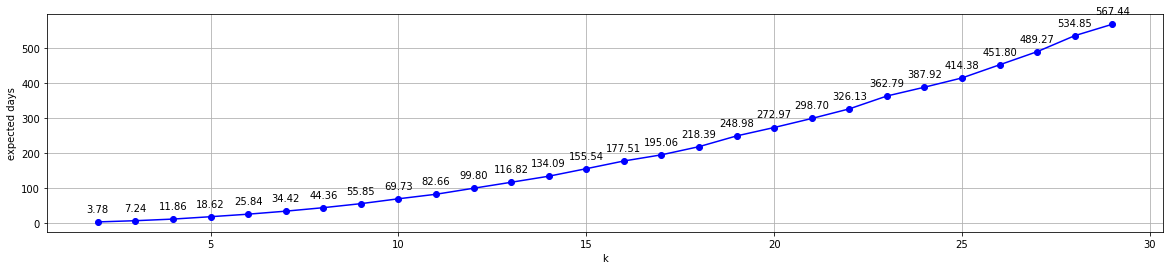

In [13]:
samples = 10000
ks = list(range(2, 30))
func_ks = []
for i in ks:
    func_ks.append(rabbit_catch_k(samples, i))
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(ks, func_ks, 'bo-')
for x, y in zip(ks, func_ks):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("k")
plt.ylabel("expected days")
plt.grid(True)
plt.show()

In [14]:
def rabbit_catch_histogram_k(samples, k):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk_k(k))
    print(f"maximum simulation days {max(caught_on_day)}")
    print(f"average simulation days {sum(caught_on_day)/samples}")
    fig, ax = plt.subplots(figsize=(20, 4))
    plt.hist(caught_on_day, bins=min(max(caught_on_day),50), edgecolor='black', linewidth=1)
    plt.xlabel("days")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()      

maximum simulation days 78
average simulation days 7.2745


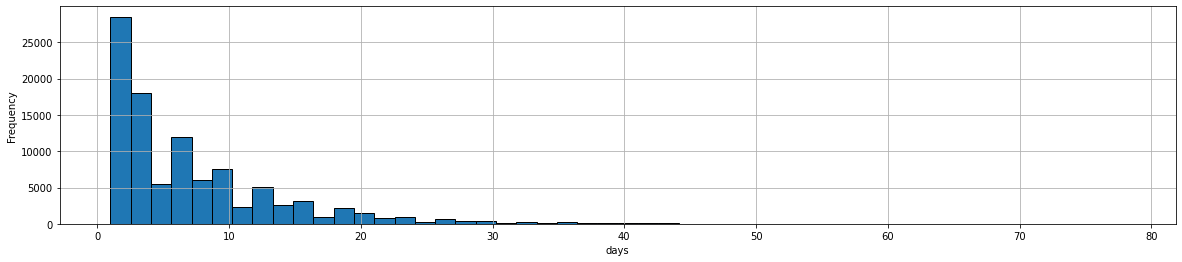

In [15]:
rabbit_catch_histogram_k(100000, 3)

### Analytic Solution for Rabbit Catching Problem

Assume there are 2k+1 holes, and the farmer is waiting at hole #k+1. The analytic formula for the expected number of steps vs k is

Give me a call if you want to know from where and how the formula was derived :)


In [16]:
from sympy import init_printing, symbols, simplify, expand
from IPython.display import display
init_printing()

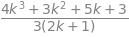

In [17]:
k = symbols('k')
f = k*(4*k-1)*(k+1)/3/(2*k+1) + 1
simplify(expand(f))

In [18]:
e2 = f.subs(k,2) # 5 holes
e3 = f.subs(k,3) # 7 holes
display(e2, e2.p/e2.q, e3, e3.p/e3.q)

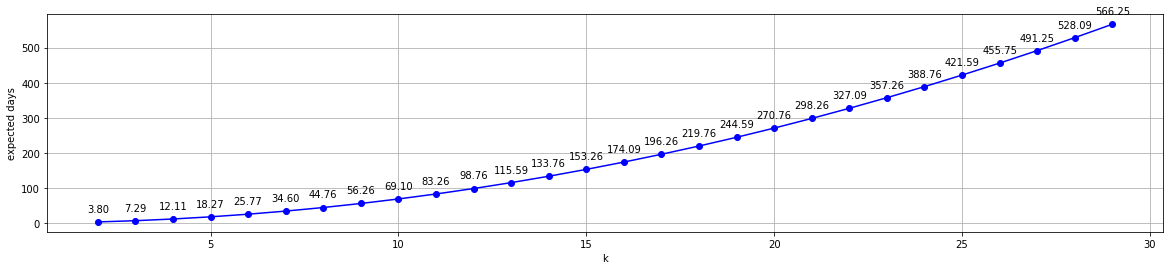

In [19]:
ks1 = list(range(2, 30))
func_ks1 = []
for i in ks1:
    e = f.subs(k, i)
    func_ks1.append(e.p/e.q)
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(ks1, func_ks1, 'bo-')
for x, y in zip(ks1, func_ks1):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("k")
plt.ylabel("expected days")
plt.grid(True)
plt.show()